Chloe Quinto     
CPE 695     
HW 3    
I pledge my honor that I have abided by the Stevens Honor System - Chloe Quinto     

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import tree
from keras.utils import to_categorical 
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


### 1. read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Take a random 70% samples for training and the rest 30% for test.

In [2]:
df = pd.read_csv('titanic.csv', header = 0)
df.head(10)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,6,1st,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.549999,E12,Southampton,3,NaN,"New York, NY"
6,7,1st,1,"Andrews, Miss. Kornelia Theodos",female,63.0000,1,0,13502,77.958298,D7,Southampton,10,NaN,"Hudson, NY"
7,8,1st,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.000000,A36,Southampton,NaN,NaN,"Belfast, NI"
8,9,1st,1,"Appleton, Mrs. Edward Dale (Cha",female,53.0000,2,0,11769,51.479198,C101,Southampton,D,NaN,"Bayside, Queens, NY"
9,10,1st,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.504200,NaN,Cherbourg,NaN,22.0,"Montevideo, Uruguay"


In [3]:
df.iloc[153]

Unnamed: 0                               154
pclass                                   1st
survived                                   1
name          Hays, Miss. Margaret Bechstein
sex                                   female
age                                       24
sibsp                                      0
parch                                      0
ticket                                 11767
fare                                 83.1583
cabin                                    C54
embarked                           Cherbourg
boat                                       7
body                                     NaN
home.dest                       New York, NY
Name: 153, dtype: object

In [4]:
df['survived'] = df["survived"].astype(int)

In [5]:
y = df["survived"]

feature_columns = ['pclass', "sex", "age", "sibsp"]
x = df[feature_columns].apply(LabelEncoder().fit_transform) 

Understanding LabelEcoder: 

| new label  | pclass  |
|---|---|
| 0  |  1st |
|  1 |  2nd  |
|  2 |  3rd |


| new label  | sex  |
|---|---|
| 0  |  male |
|  1 |  female  |


In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state=None)

In [7]:
xtrain

,pclass,sex,age,sibsp
1091,2,0,29,0
747,2,1,1,0
623,2,0,12,4
830,2,1,21,5
731,2,1,28,0
...,...,...,...,...
565,1,1,38,0
154,0,1,77,1
192,0,0,81,0
397,1,1,76,0


As a note on random_state: 
    if None, the random number generate is the Random State instance used by np.random

Let's look at the shape of our data 

In [8]:
print("xtrain shape: ", xtrain.shape)
print("xtest shape: ", xtest.shape)
print('\n')
print("ytrain shape: ", ytrain.shape)
print("ytest shape: ", ytest.shape)

xtrain shape:  (916, 4)
xtest shape:  (393, 4)


ytrain shape:  (916,)
ytest shape:  (393,)


### 2. Fit a decision tree model using independent variables 'pclass + sex + age + sibsp' and depndent variable 'survived'. Plot the full tree. Male sure 'survived' is a qualitiative variable taking in 1(yes) or 0 (no) into your code 

In [9]:
# Decision Tree Classifier Object 
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifier 
clf = clf.fit(xtrain, ytrain)

# Predict the response for test dataset
y_pred = clf.predict(xtest)

In [11]:
# evaluating the model's overall accuracy
print("Accuracy: ", metrics.accuracy_score(ytest, y_pred))

Accuracy:  0.7557251908396947


In [47]:


print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[210  39]
 [ 57  87]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       249
           1       0.69      0.60      0.64       144

    accuracy                           0.76       393
   macro avg       0.74      0.72      0.73       393
weighted avg       0.75      0.76      0.75       393



In [ ]:
# Please uncomment to visualize this tree: 

# !pip install graphviz
# !pip install pydotplus 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


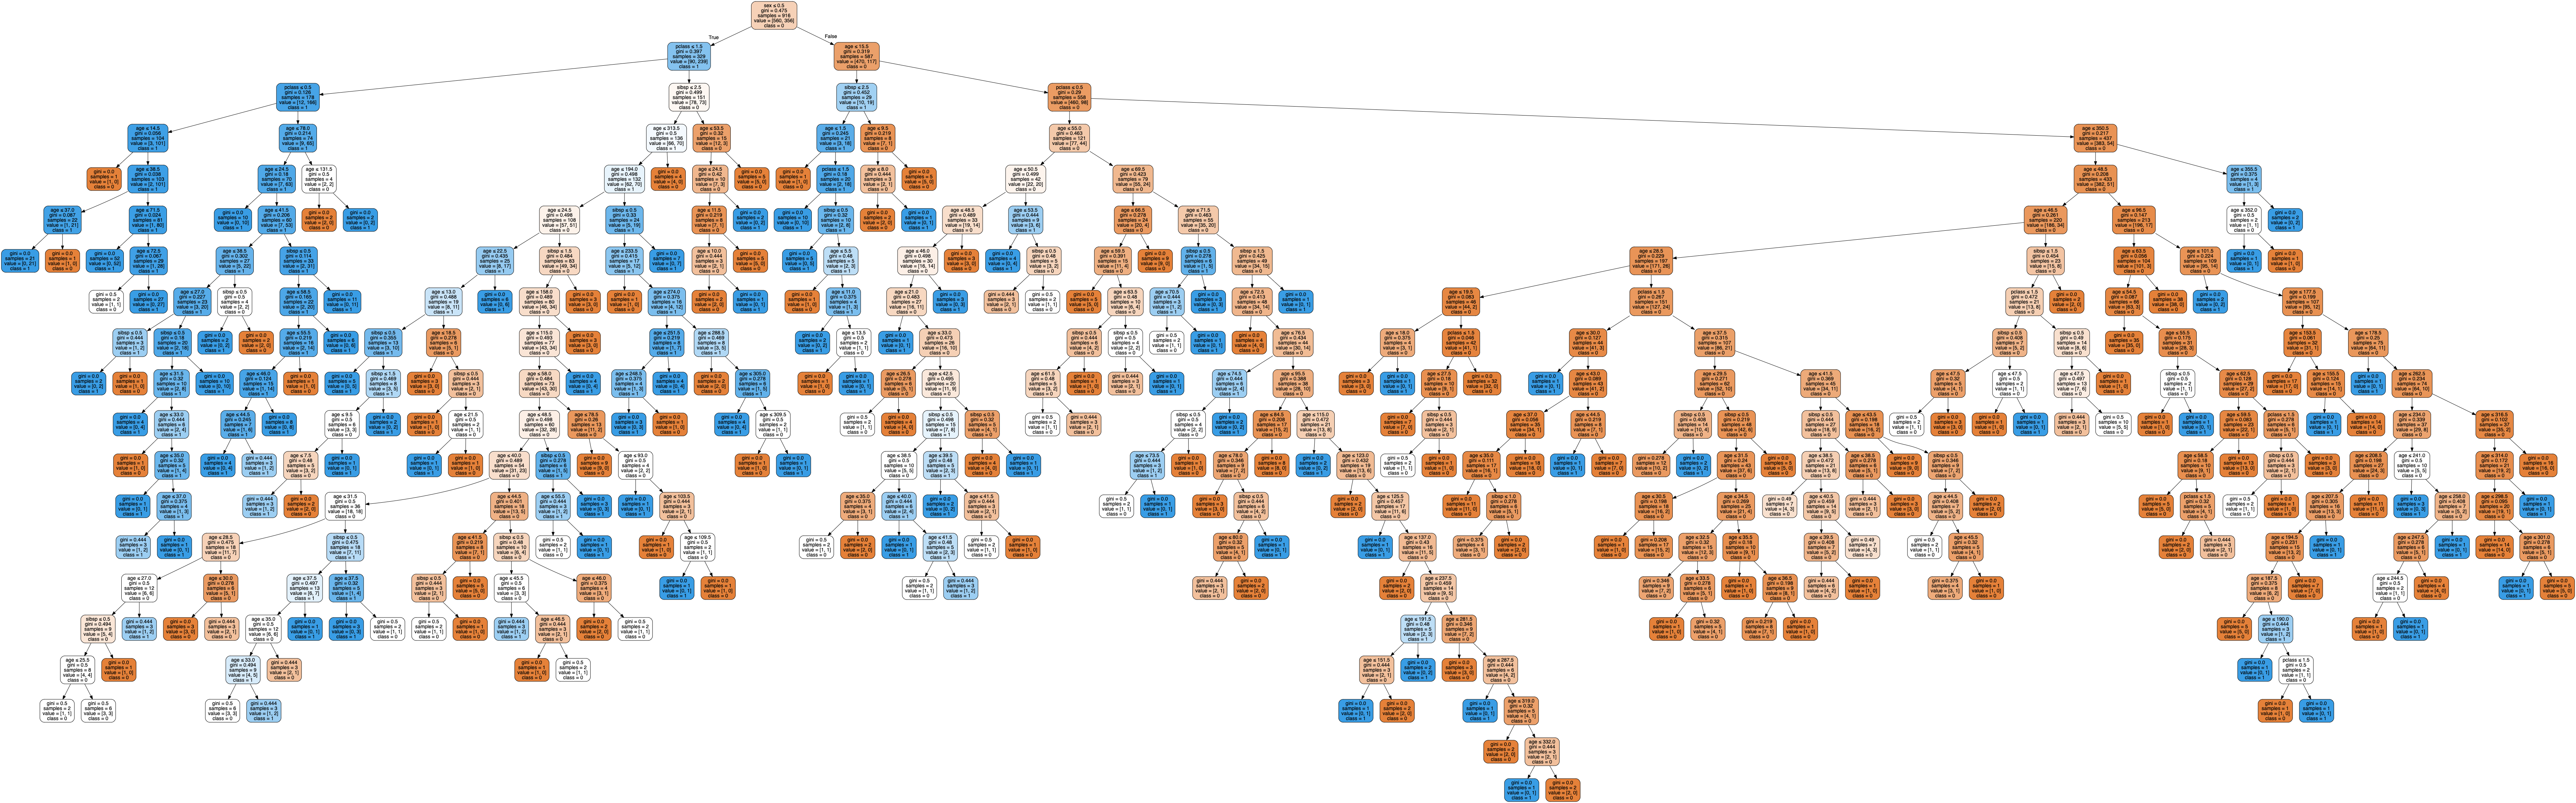

In [12]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('FullDecisionTree.png')
Image(graph.create_png())

### 3. print out the performance measures of the full model: in-sample and out-of-sample accuracy 
- in-sample percent survivors correctly predicted(on training set)
- in-sample percent fatalities correctly predicted (on training set)
- out-of-sample percent survivors correctly predicted (on test set) 
- out-of-sample percent fatalities correctly predicted (on test set) 

In [13]:
c_matrix = confusion_matrix(ytest, y_pred)
c_matrix

array([[209,  40],
       [ 56,  88]])

The survivors correctly predicted to have survived: TP 

In [14]:
outSampleSurvivors = c_matrix[1][1]/(c_matrix[1][1] + c_matrix[0][1]) 
outSampleFatalities = c_matrix[0][0]/(c_matrix[0][0] + c_matrix[1][0]) 

In [15]:
print("Out-of-sample survivors on testing: ", outSampleSurvivors*100)
print("Out-of-sample fatalities on testing: ", outSampleFatalities*100)

Out-of-sample survivors on testing:  68.75
Out-of-sample fatalities on testing:  78.8679245283019


### 4. Use cross-validation to find the best parameter to prune the tree. You should be able to plot a graph with the "tree size" as the x-axis and "number of misclassifications" on the Y-axis. Find the minimum number of classifications and choose the corresponding tree size to prune the tree. 

In [89]:
rates = []
depth = []
for i in range(3,20): 
    
    clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = i)

    clf = clf.fit(xtrain, ytrain)

    y_pred = clf.predict(xtest)

    confusion_matrix = metrics.confusion_matrix(ytest, y_pred)

    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]  
    FN = confusion_matrix[1, 0]  

    misclassification_rate = (FP + FN) / float(TP + TN + FP + FN)
    depth.append(i)
    rates.append(misclassification_rate)

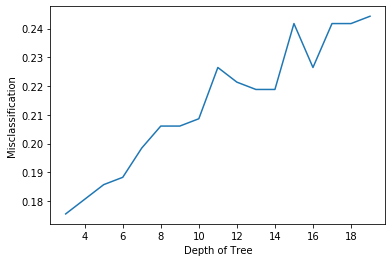

In [90]:
plt.plot(depth, rates)
plt.xlabel("Depth of Tree")
plt.ylabel("Misclassification")
plt.show()

In [78]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=xtrain, y=ytrain)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7794606794963174 {'max_depth': 7}


In [69]:
from pprint import pprint

In [71]:
pprint(clf.cv_results_)

{'mean_fit_time': array([0.00299764, 0.00466356, 0.00339117, 0.00218282, 0.00213394,
       0.00317473, 0.00273075, 0.00248775, 0.00307932, 0.00457554,
       0.00305986, 0.00723343, 0.0060637 , 0.00348101, 0.0039578 ,
       0.00329103, 0.00315871]),
 'mean_score_time': array([0.00142179, 0.0014298 , 0.00101771, 0.00102096, 0.00097308,
       0.00128527, 0.00113521, 0.00116324, 0.00130205, 0.00135326,
       0.00209403, 0.0019073 , 0.00118537, 0.00153465, 0.0014287 ,
       0.0018692 , 0.00115962]),
 'mean_test_score': array([0.77729271, 0.77618793, 0.77728677, 0.7794785 , 0.78055358,
       0.77836184, 0.76965431, 0.76418983, 0.76635187, 0.75105726,
       0.7510632 , 0.74887741, 0.7456106 , 0.74125683, 0.74016393,
       0.74234379, 0.74125089]),
 'param_max_depth': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                   18, 19],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False

In [93]:
def run_gridsearch(X, y, clf, param_grid, cv=5):
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv)
    start = time()
    grid_search.fit(X, y)

    print(("\nGridSearchCV took {:.2f} "
           "seconds for {:d} candidate "
           "parameter settings.").format(time() - start,
                len(grid_search.grid_scores_)))

    top_params = report(grid_search.grid_scores_, 3)
    return  top_params

In [97]:
# print("-- 10-fold cross-validation "
# #       "[using setup from previous post]")
# dt_old = tree.DecisionTreeClassifier(min_samples_split=20,
#                                 random_state=99)
# dt_old.fit(X, y)
# scores = cross_val_score(dt_old, X, y, cv=10)
# print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
#                                           scores.std()),
#                                           end="\n\n" )

In [98]:
print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

dt = tree.DecisionTreeClassifier()
ts_gs = run_gridsearch(x, y, dt, param_grid, cv=10)

-- Grid Parameter Search via 10-fold CV


NameError: name 'time' is not defined